In [1]:
from ipynb.fs.full.HAP_DataProcessing import *


<class 'pandas.core.frame.DataFrame'>
Int64Index: 595 entries, 1 to 927
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       595 non-null    float64
 1   sex       595 non-null    float64
 2   cp        595 non-null    float64
 3   trestbps  595 non-null    float64
 4   chol      595 non-null    float64
 5   fbs       595 non-null    float64
 6   restecg   595 non-null    float64
 7   thalach   595 non-null    float64
 8   exang     595 non-null    float64
 9   oldpeak   595 non-null    float64
 10  slope     595 non-null    float64
 11  ca        595 non-null    float64
 12  thal      595 non-null    float64
 13  num       595 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 69.7 KB


None

# Logistic Regression

In [2]:
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing

X = np.asarray(hap_df[['age', 'sex', 'cp','trestbps', 'chol', 'fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']])
y = np.asarray(hap_df['num'])
 
# normalization of the dataset
X = preprocessing.StandardScaler().fit(X).transform(X)
 
# Train-and-Test -Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.3, random_state = 4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (416, 13) (416,)
Test set: (179, 13) (179,)


In [3]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_y_pred = logreg.predict(X_test)
 
# Evaluation and accuracy
from sklearn.metrics import accuracy_score
print('')
print('Accuracy score is = ',
      accuracy_score(y_test, logreg_y_pred))


Accuracy score is =  0.8938547486033519


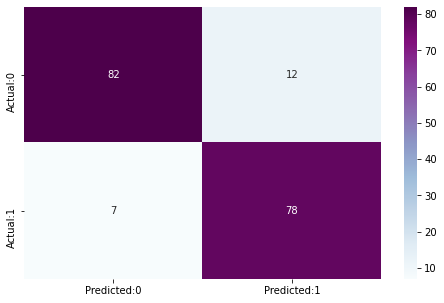

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.92      0.87      0.90        94
           1       0.87      0.92      0.89        85

    accuracy                           0.89       179
   macro avg       0.89      0.89      0.89       179
weighted avg       0.90      0.89      0.89       179



In [4]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sn
 
cm = confusion_matrix(y_test, logreg_y_pred)
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (8, 5))
sn.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "BuPu")
plt.show()
 
print('The details for confusion matrix is =')
print (classification_report(y_test, logreg_y_pred))

# Decission Tree

In [5]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_y_pred = dtree.predict(X_test)
 
# Evaluation and accuracy
from sklearn.metrics import accuracy_score
print('')
print('Accuracy score is = ',
      accuracy_score(y_test, dtree_y_pred))


Accuracy score is =  0.9106145251396648


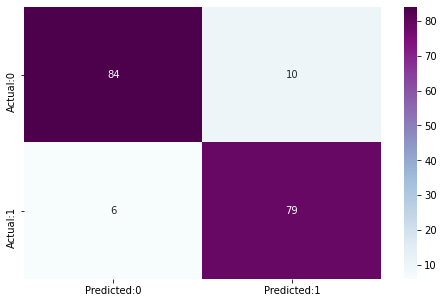

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        94
           1       0.89      0.93      0.91        85

    accuracy                           0.91       179
   macro avg       0.91      0.91      0.91       179
weighted avg       0.91      0.91      0.91       179



In [6]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sn
 
cm = confusion_matrix(y_test, dtree_y_pred)
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (8, 5))
sn.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "BuPu")
plt.show()
 
print('The details for confusion matrix is =')
print (classification_report(y_test, dtree_y_pred))

# Random Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier (n_estimators=100)
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)
 
# Evaluation and accuracy
from sklearn.metrics import accuracy_score
print('')
print('Accuracy score is = ',
      accuracy_score(y_test, rf_y_pred))


Accuracy score is =  0.9664804469273743


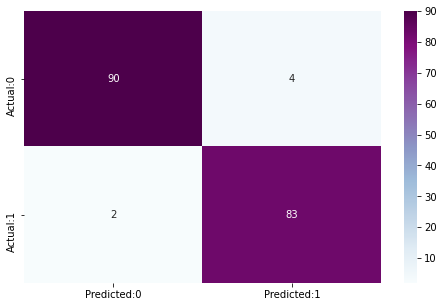

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        94
           1       0.95      0.98      0.97        85

    accuracy                           0.97       179
   macro avg       0.97      0.97      0.97       179
weighted avg       0.97      0.97      0.97       179



In [8]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sn
 
cm = confusion_matrix(y_test, rf_y_pred)
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (8, 5))
sn.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "BuPu")
plt.show()
 
print('The details for confusion matrix is =')
print (classification_report(y_test, rf_y_pred))

# Support Vector Machine

In [9]:
from sklearn.svm import SVC
svc = SVC(kernel="linear",probability=True)
svc.fit(X_train, y_train)
svc_y_pred = svc.predict(X_test)
 
# Evaluation and accuracy
from sklearn.metrics import accuracy_score
print('')
print('Accuracy score is = ',
      accuracy_score(y_test, svc_y_pred))


Accuracy score is =  0.88268156424581


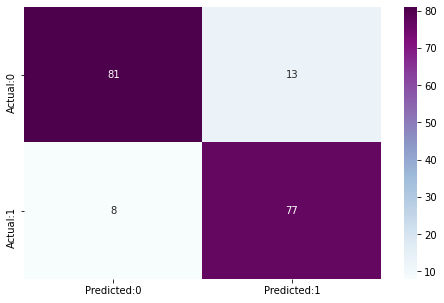

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.91      0.86      0.89        94
           1       0.86      0.91      0.88        85

    accuracy                           0.88       179
   macro avg       0.88      0.88      0.88       179
weighted avg       0.88      0.88      0.88       179



In [10]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sn
 
cm = confusion_matrix(y_test, svc_y_pred)
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (8, 5))
sn.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "BuPu")
plt.show()
 
print('The details for confusion matrix is =')
print (classification_report(y_test, svc_y_pred))

# Model evaluation

Populating the interactive namespace from numpy and matplotlib


C:\Users\aditya.sumbaraju\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['cm']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


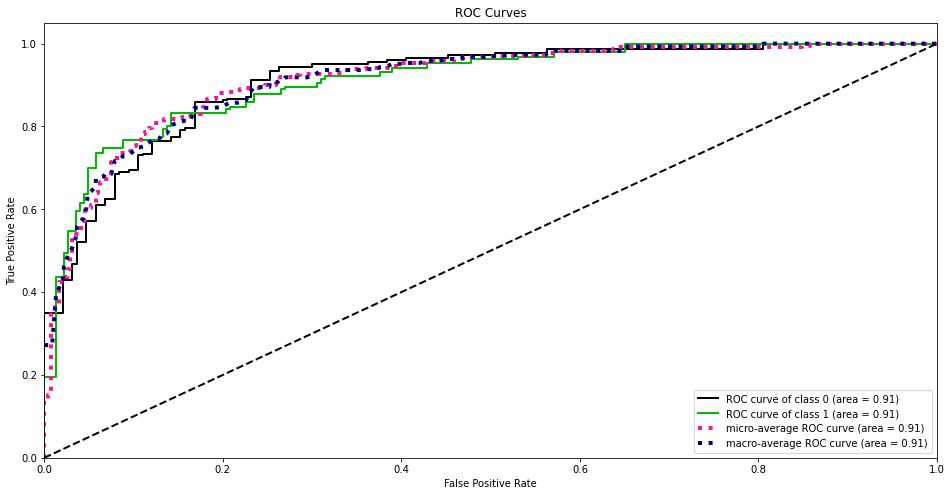

In [11]:
# Logistic Regression
%pylab inline
pylab.rcParams['figure.figsize'] = (16,8)
import scikitplot as skplt
lr_y_probas = logreg.predict_proba(X_train)
skplt.metrics.plot_roc(y_train, lr_y_probas)
plt.show()

Populating the interactive namespace from numpy and matplotlib


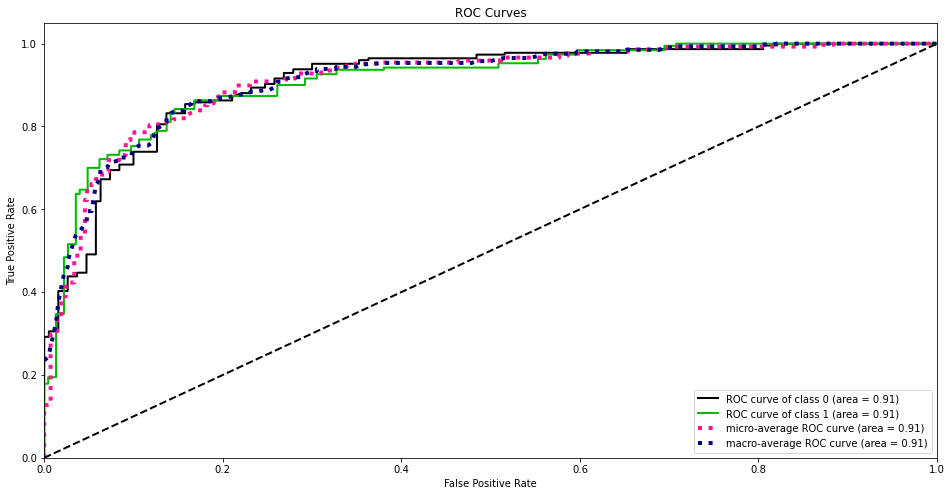

In [12]:
# SVC
%pylab inline
pylab.rcParams['figure.figsize'] = (16,8)
svc_y_probas = svc.predict_proba(X_train)
skplt.metrics.plot_roc(y_train, svc_y_probas)
plt.show()

Populating the interactive namespace from numpy and matplotlib


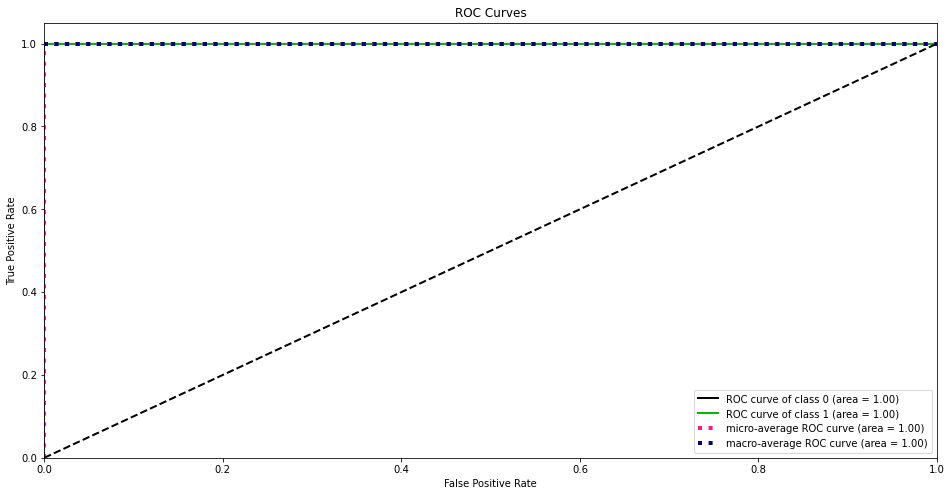

In [13]:
# Random Forest
%pylab inline
pylab.rcParams['figure.figsize'] = (16,8)
rfc_y_probas = rf.predict_proba(X_train)
skplt.metrics.plot_roc(y_train, rfc_y_probas)
plt.show()

Populating the interactive namespace from numpy and matplotlib


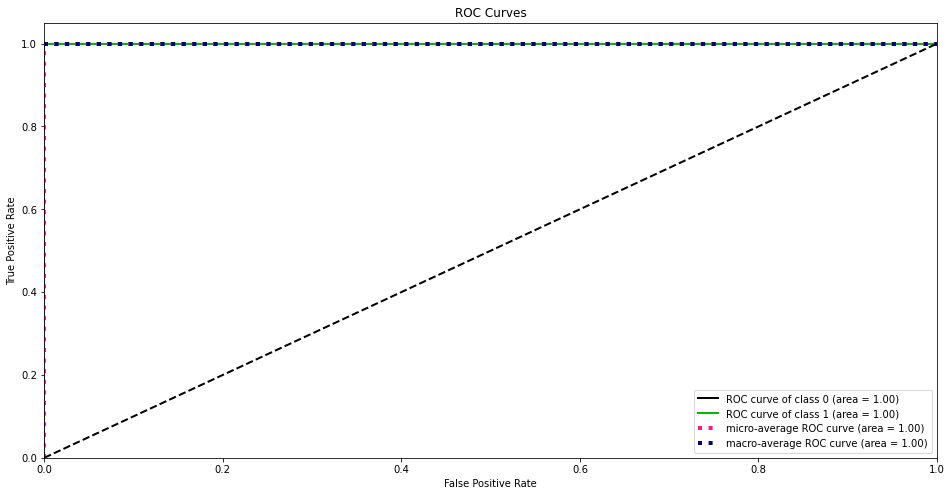

In [14]:
#Decision Tree
%pylab inline
pylab.rcParams['figure.figsize'] = (16,8)
dtree_y_probas = dtree.predict_proba(X_train)
skplt.metrics.plot_roc(y_train, dtree_y_probas)
plt.show()

# Model Results

In [18]:
import numpy as np
model_data =[['Random Forest Classifier',float(np.round(accuracy_score(y_test, rf_y_pred),2)) ],
             ['Decision Tree', float(np.round(accuracy_score(y_test, dtree_y_pred),2))],
             ['Logistic Regression', float(np.round(accuracy_score(y_test, logreg_y_pred),2))],
             ['SVM Classifier',  float(np.round(accuracy_score(y_test, svc_y_pred),2))]]

indexes = [1,2,3,4]
columns_name = ['MODEL', 'ACCURACY_SCORE']
acc_result = pd.DataFrame(data = model_data,index = indexes, columns =columns_name )
display (acc_result)

,MODEL,ACCURACY_SCORE
1,Random Forest Classifier,0.97
2,Decision Tree,0.91
3,Logistic Regression,0.89
4,SVM Classifier,0.88
